In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sage.graphs.graph import Graph

In [26]:
G = graphs.RandomGNP(20,0.2)
if not G.is_connected():
    G = G.connected_component_subgraph(max(G.connected_components()))

In [27]:
def fiedler_vect(G):
    L = G.laplacian_matrix()
    eigs = L.eigenvectors_right()
    eigs.sort(key=lambda triple:triple[0])
    if len(eigs)<2:
        raise ValueError("insufficient eigenvectors")
    fiedler_v = eigs[1][1][0]
    
    vertices = G.vertices()
    fiedler_val = {v: fiedler_v[i] for i, v in enumerate(vertices)}
    

    fiedler_ordered = sorted(vertices, key=lambda v:fiedler_val[v])
    print("vertices in fiedler order", fiedler_ordered)
    return fiedler_ordered, fiedler_val

In [28]:
ordered, vals= fiedler_vect(G)

vertices in fiedler order [8, 6, 16, 7, 11, 14, 2, 5, 3, 0, 18, 12, 9, 10, 15, 19, 13, 1, 4, 17]


In [32]:
vals = [vals[v] for v in ordered]

In [55]:
def cluster_data(ordered, vals, threshold_factor=2.0, vertical_spacing=2.0, jitter=0.1):
    x = np.array([float(vals[v]) for v in ordered])
    sort_idx = np.argsort(x)
    sorted_x = x[sort_idx]
    sorted_labels = np.array(ordered)[sort_idx]
    gaps = np.diff(sorted_x)
    median_gap = np.median(gaps) if len(gaps) > 0 else 0
    large_gap_threshold = threshold_factor * median_gap
    print("median gap", median_gap, "gap threshold chosen:", large_gap_threshold)
    groups = []
    current_group = [0]
    for i, gap in enumerate(gaps):
        if gap > large_gap_threshold:
            groups.append(current_group)
            current_group = [i+1]
        else:
            current_group.append(i+1)
    groups.append(current_group)
    
    counts = [len(g) for g in groups]
    min_count, max_count = min(counts), max(counts)
    cmap = plt.cm.viridis
    norm = plt.Normalize(vmin=min_count, vmax=max_count)
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, group in enumerate(groups):
        group_x = sorted_x[group]
        group_labels = sorted_labels[group]
        x_min = np.min(group_x)
        x_max = np.max(group_x)
        center_x = (x_min + x_max) / 2
        y_center = i * vertical_spacing
        cluster_jitter = max(0.1, (x_max - x_min) / 10)
        pts_y = y_center + np.random.uniform(-cluster_jitter, cluster_jitter, size=len(group_x))
        ax.scatter(group_x, pts_y, s=50, zorder=2)
        for j, label in enumerate(group_labels):
            ax.annotate(str(label), (group_x[j], pts_y[j]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)
        width = (x_max - x_min) * 1.2 if (x_max - x_min) != 0 else 1.2
        height = vertical_spacing * 0.8
        color = cmap(norm(len(group)))
        ell = Ellipse((center_x, y_center), width, height, facecolor=color, alpha=0.5, edgecolor='none', zorder=1)
        ax.add_patch(ell)
        ax.text(x_min, y_center, f"{x_min:.1f}", va='center', ha='right', fontsize=9, color='blue')
        ax.text(x_max, y_center, f"{x_max:.1f}", va='center', ha='left', fontsize=9, color='blue')
        ax.plot([x_min, x_min], [y_center - height/2, y_center + height/2], color='blue', linestyle='--', linewidth=1, zorder=3)
        ax.plot([x_max, x_max], [y_center - height/2, y_center + height/2], color='blue', linestyle='--', linewidth=1, zorder=3)
    ax.set_xlabel("fiedler values")
    ax.set_yticks([i * vertical_spacing for i in range(len(groups))])
    ax.set_yticklabels([f"cluster {i+1}" for i in range(len(groups))])
    plt.tight_layout()
    plt.show()
    
    clusters = []
    for group in groups:
        cluster_labels = sorted_labels[group].tolist()
        cluster_values = sorted_x[group].tolist()
        clusters.append({'vertices': cluster_labels, 'fiedler values': cluster_values})
    return clusters

median gap 0.3819547331992279 gap threshold chosen: 0.7639094663984558


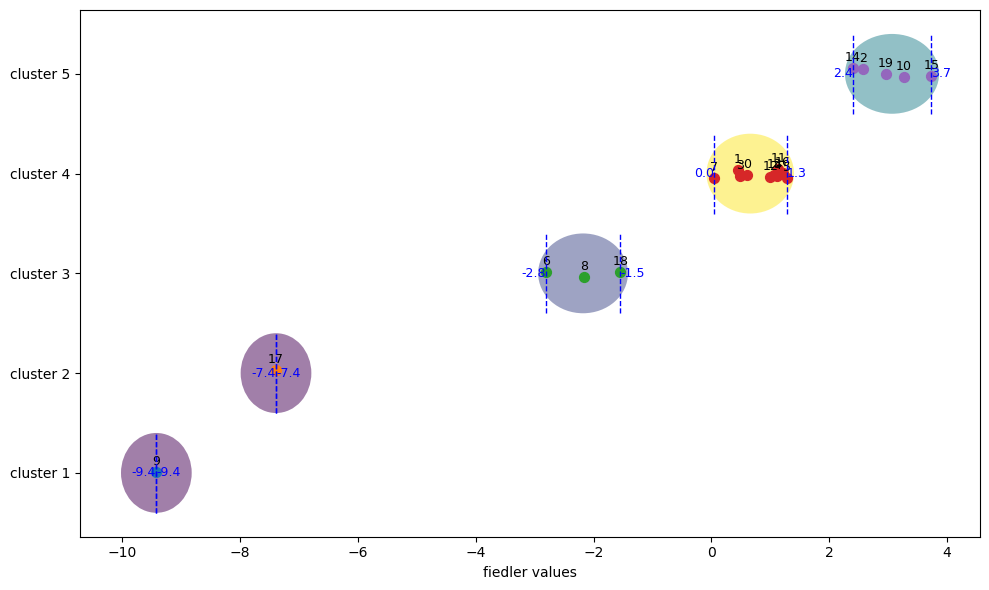

[{'vertices': [9], 'fiedler values': [-9.420502152827531]},
 {'vertices': [17], 'fiedler values': [-7.389490895365514]},
 {'vertices': [6, 8, 18],
  'fiedler values': [-2.8127434379344685,
   -2.162759634711791,
   -1.5427730813041673]},
 {'vertices': [7, 1, 3, 0, 12, 13, 4, 11, 16, 5],
  'fiedler values': [0.041031697299559466,
   0.4440252661262143,
   0.4844363107335664,
   0.6060899943025595,
   1.0,
   1.0675177121453685,
   1.1184065573790298,
   1.1378175457965396,
   1.2187651138796247,
   1.279252164263609]},
 {'vertices': [14, 2, 19, 10, 15],
  'fiedler values': [2.401169544697078,
   2.575692133367208,
   2.957646866566436,
   3.2639899222310884,
   3.7324283733555914]}]

In [56]:
cluster_data(ordered, vals, threshold_factor=2.0)